# Coursework #2 AI for Sustainable Development

## Coursework overview
Coursework #2 is a data analysis coding-based coursework. You are asked to choose a dataset related to sustainable development and do some machine learning based analysis. We will detail this more in the next sections.

You can choose an application/dataset from the ones we analysed in the first coursework or choose a completely new dataset: 
* **Option 1**: Choose a dataset from the SustainBench paper (which includes 15 datasets related to sustainable development), please do not choose the climate action one related to brick kilns, as we will use it in class.
You can choose the same dataset that you use in coursework #1. Please note that the authors from SustainBench have a GitHub project with data loaders, preprocessing code and baselines for these datasets here: https://github.com/sustainlab-group/sustainbench
* **Option 2**: Choose an alternative dataset of your choice (e.g. that you are interested in). Please if you choose this option motivate the dataset's relationship to sustainable development. If the dataset is part of an online competition (e.g. in Kaggle, Zindi, etc), please make sure to include information that makes us discern what you have built, vs what was built from someone else (since in some cases participants of the competition submit tutorials, etc). 

Please do NOT choose the same dataset that you used as part of a different coursework for a different module (which may be possible as the coursework is up to some extent open ended), as this would be considered self-plagiarism. 

Once you have chosen your dataset we will ask you to do the following: 
1. Do some **exploratory data analysis** to get some insights about the dataset. We do not give specific guidelines here as this may depend on the dataset itself, but we ask you to justify your choices and the results of your analysis.
2. Think about the **task that the dataset is most suitable for** and discuss what would be the most **appropriate evaluation criteria** for such a machine learning task. For example, you may have a dataset where songs are labelled with different music genres. Perhaps the task for which the dataset is most suitable for is to build a multi label prediction model that can classify new songs, and the most appropriate evaluation metric could be the hamming loss (commonly used in multi label prediction, which could be used both as inspiration for a training objective for neural networks, or simply as the evaluation criteria for model selection and hyperparameter tuning). 
3. **Design and implement a machine learning system/pipeline**. This could be either supervised or unsupervised. In either case, the pipeline you choose needs to be aligned with the task you defined before. 
4. **Design a set of experiments** and discuss how these fit with the questions that the dataset aims to address. Do a **performance & scalability analysis** of your model.
5. Analyse and discuss some of the **ethical implications**, in connection with your exploratory data analysis and model performance (e.g. do you appreciate any imbalances in the data or initial biases that can be problematic?).
6. Discuss **sustainable development relevance & impact**.

We ask your code to be in python, but beyond that we do not mind what packages you use. 

For grading, we will not check your code in depth (beyond perhaps checking that it's doing what you describe). Instead, our focus will be on grading the analysis you have done, how well it's motivated and justified, how insightful it was, how do you interpret the results in terms of impact and sustainable development, etc.

**Submission**: You do not have to submit your dataset and notebook to the coursework submission. Simply run the analysis in jupyter notebooks and then export the notebook as html or pdf. You can then submit this html/pdf file in moodle. 

### Previous work (5%)

**Guidelines**: We first ask you to summarise what has been done before with this dataset. While this is not specifically necessary for the purpose of the coursework, it is important for us to mark the novelty of your analysis, specially since many of these datasets come with associated baselines in the GitHub link we shared before. While we encourage you to compare to what has been done before we will evaluate whether you explored new approaches. Please give us in this section a brief introduction to the dataset and to the previous models that were built before using the data (you do not need to go over all models that were proposed before, you can just focus on the one with the best performance). Tell us whether these models were publicly available, and if so where to find them. It is crucial that in the next sections you justify how your analysis differs from this previous work.

<span style='color:red'> **[To be completed by you]** </span>
 

### Exploratory data analysis (15%)

**Guidelines**: Load the dataset and answer the following questions: 
* What are the characteristics of your dataset? Do you see any trends in the data? (5%)
* Are there any challenges with the data? (missing values, outliers, imbalanced classes, biases, etc...) (5%)
* Does the data need any pre-processing to successfully apply standard machine learning models? If so, what kind? Please do the pre-processing that you consider necessary. (5%)

You can use descriptive statistics here, figures/plots, etc. 


In [1]:
# your code here!
# load relevant packages, load your dataset, start your analysis
# you can have as many code cells as needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates



In [2]:
df = pd.read_csv('original_full_data/localization+data+for+person+activity/ConfLongDemo_JSI.csv')
df.head()

,sequence_name,tag_identifier,timestamp,date,x_coord,y_coord,z_coord,activity
0,A01,010-000-024-033,633790226051280329,27.05.2009 14:03:25:127,4.062931,1.892434,0.507425,walking
1,A01,020-000-033-111,633790226051820913,27.05.2009 14:03:25:183,4.291954,1.781140,1.344495,walking
2,A01,020-000-032-221,633790226052091205,27.05.2009 14:03:25:210,4.359101,1.826456,0.968821,walking
3,A01,010-000-024-033,633790226052361498,27.05.2009 14:03:25:237,4.087835,1.879999,0.466983,walking
4,A01,010-000-030-096,633790226052631792,27.05.2009 14:03:25:263,4.324462,2.072460,0.488065,walking


In [3]:
df.describe()

,timestamp,x_coord,y_coord,z_coord
count,1.648600e+05,164860.000000,164860.000000,164860.000000
mean,6.337902e+17,2.811348,1.696877,0.418210
std,5.518139e+10,0.916226,0.473769,0.379125
min,6.337901e+17,-0.278698,-0.494428,-2.543609
25%,6.337901e+17,2.155791,1.350501,0.171623
50%,6.337902e+17,2.880423,1.634170,0.366285
75%,6.337902e+17,3.414097,2.039314,0.613117
max,6.337903e+17,5.758173,3.978097,2.606105


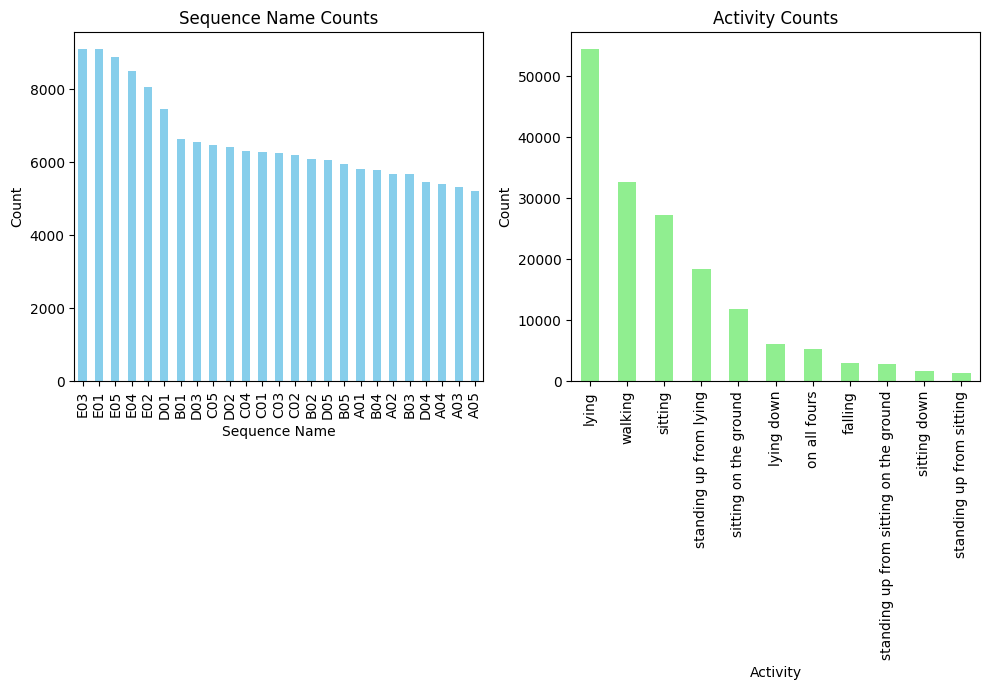

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 7))

# Plot for sequence_name counts
df['sequence_name'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Sequence Name Counts')
axes[0].set_xlabel('Sequence Name')
axes[0].set_ylabel('Count')

# Plot for activity counts
df['activity'].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Activity Counts')
axes[1].set_xlabel('Activity')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [5]:
unique_sequences = df['sequence_name'].unique()

activity_df = pd.DataFrame()
index = 0
for sequence in unique_sequences:
    
    sequence_df = df[df['sequence_name'] == sequence]
    value_df = pd.DataFrame([sequence_df['activity'].value_counts().to_dict()], index=[index])
    value_df.insert(0, 'sequence_name', sequence)
    activity_df = pd.concat([activity_df, value_df], axis=0)
    index += 1

activity_df = activity_df.rename(columns={'activity': 'sequence_name'})
nan_count = activity_df.isna().sum()

print(nan_count)

sequence_name                             0
lying                                     0
sitting                                   0
walking                                   0
sitting on the ground                     1
standing up from lying                    0
on all fours                              0
lying down                                0
standing up from sitting on the ground    1
falling                                   0
sitting down                              0
standing up from sitting                  0
dtype: int64


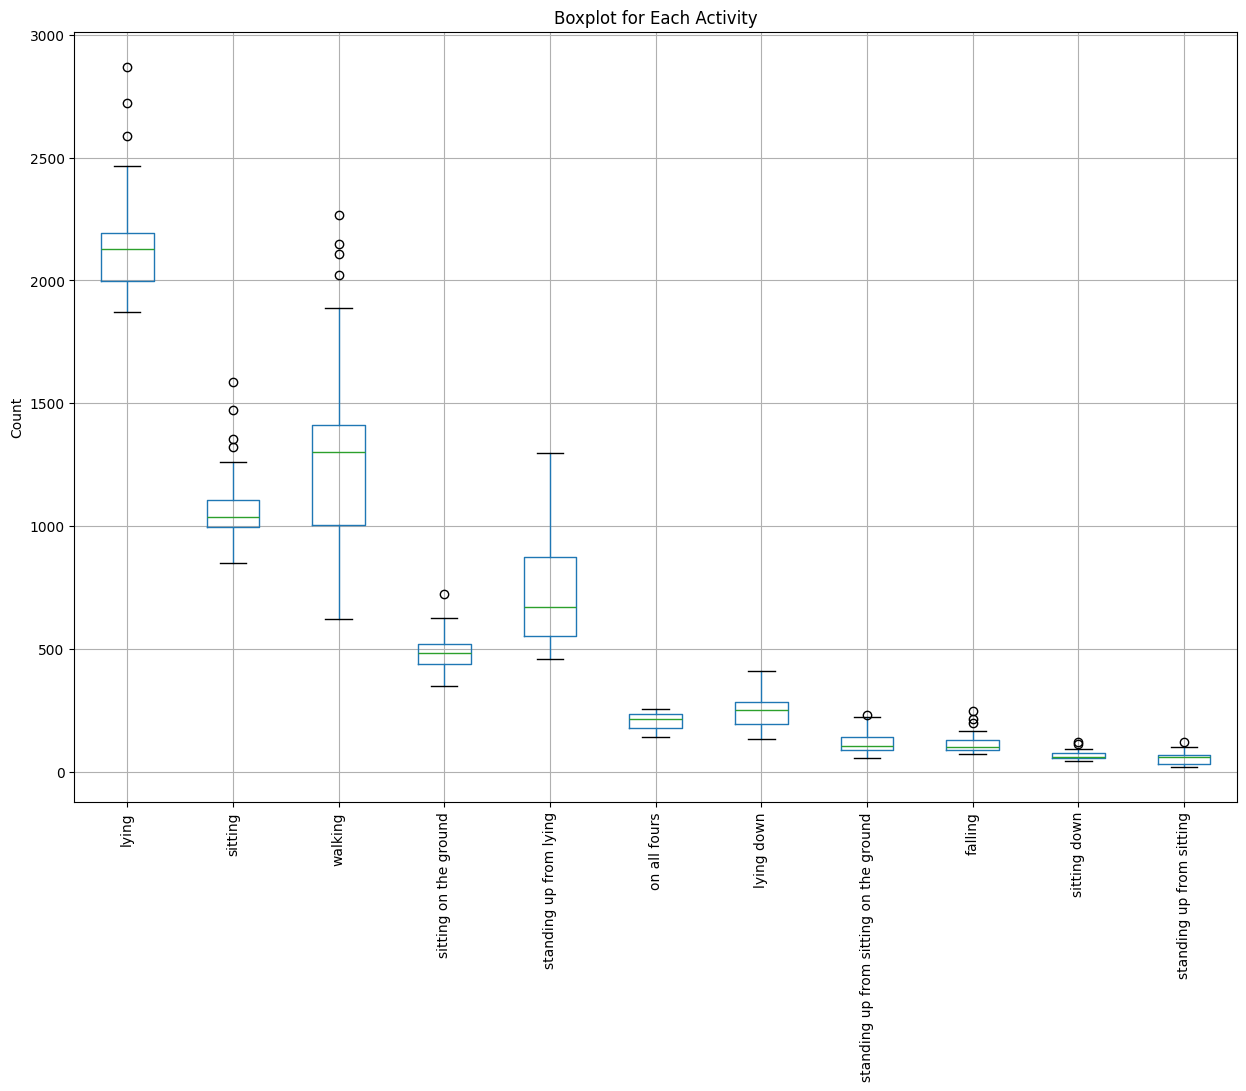

In [6]:
activity_df.describe()
activity_df.boxplot(column=['lying', 
                            'sitting', 
                            'walking', 
                            'sitting on the ground', 
                            'standing up from lying', 
                            'on all fours', 
                            'lying down', 
                            'standing up from sitting on the ground', 
                            'falling', 
                            'sitting down', 
                            'standing up from sitting'], 
                            figsize=(15, 10))
plt.title('Boxplot for Each Activity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [7]:
unique_sequences = df['sequence_name'].unique()
sequence = unique_sequences[0]  # Select the first sequence
sequence_data = df[df['sequence_name'] == sequence]

In [8]:
print(sequence_data.to_string())

     sequence_name   tag_identifier           timestamp                     date   x_coord   y_coord   z_coord                                activity
0              A01  010-000-024-033  633790226051280329  27.05.2009 14:03:25:127  4.062931  1.892434  0.507425                                 walking
1              A01  020-000-033-111  633790226051820913  27.05.2009 14:03:25:183  4.291954  1.781140  1.344495                                 walking
2              A01  020-000-032-221  633790226052091205  27.05.2009 14:03:25:210  4.359101  1.826456  0.968821                                 walking
3              A01  010-000-024-033  633790226052361498  27.05.2009 14:03:25:237  4.087835  1.879999  0.466983                                 walking
4              A01  010-000-030-096  633790226052631792  27.05.2009 14:03:25:263  4.324462  2.072460  0.488065                                 walking
5              A01  020-000-033-111  633790226052902087  27.05.2009 14:03:25:290  4.364077  1.

In [9]:
sequence_data['date'] = pd.to_datetime(sequence_data['date'], format='%d.%m.%Y %H:%M:%S:%f')

/var/folders/y9/ljmy0xzd7kdf0l4gvkhcw4pr0000gn/T/ipykernel_96428/314613388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sequence_data['date'] = pd.to_datetime(sequence_data['date'], format='%d.%m.%Y %H:%M:%S:%f')


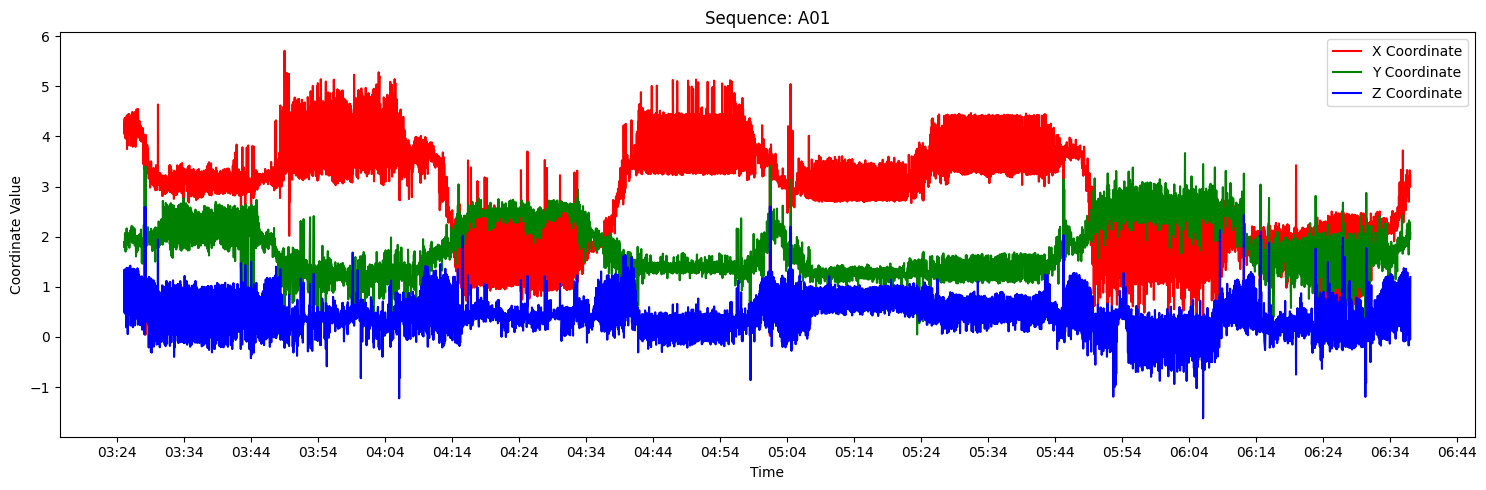

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(sequence_data['date'], sequence_data['x_coord'], label='X Coordinate', color='r')
ax.plot(sequence_data['date'], sequence_data['y_coord'], label='Y Coordinate', color='g')
ax.plot(sequence_data['date'], sequence_data['z_coord'], label='Z Coordinate', color='b')
ax.set_title(f'Sequence: {sequence}')
ax.set_xlabel('Time')
ax.set_ylabel('Coordinate Value')
ax.legend()

locator = mdates.SecondLocator(interval=10)  # Set interval to 30 seconds
formatter = mdates.DateFormatter('%M:%S')  # Format to show hours, minutes, and seconds
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()


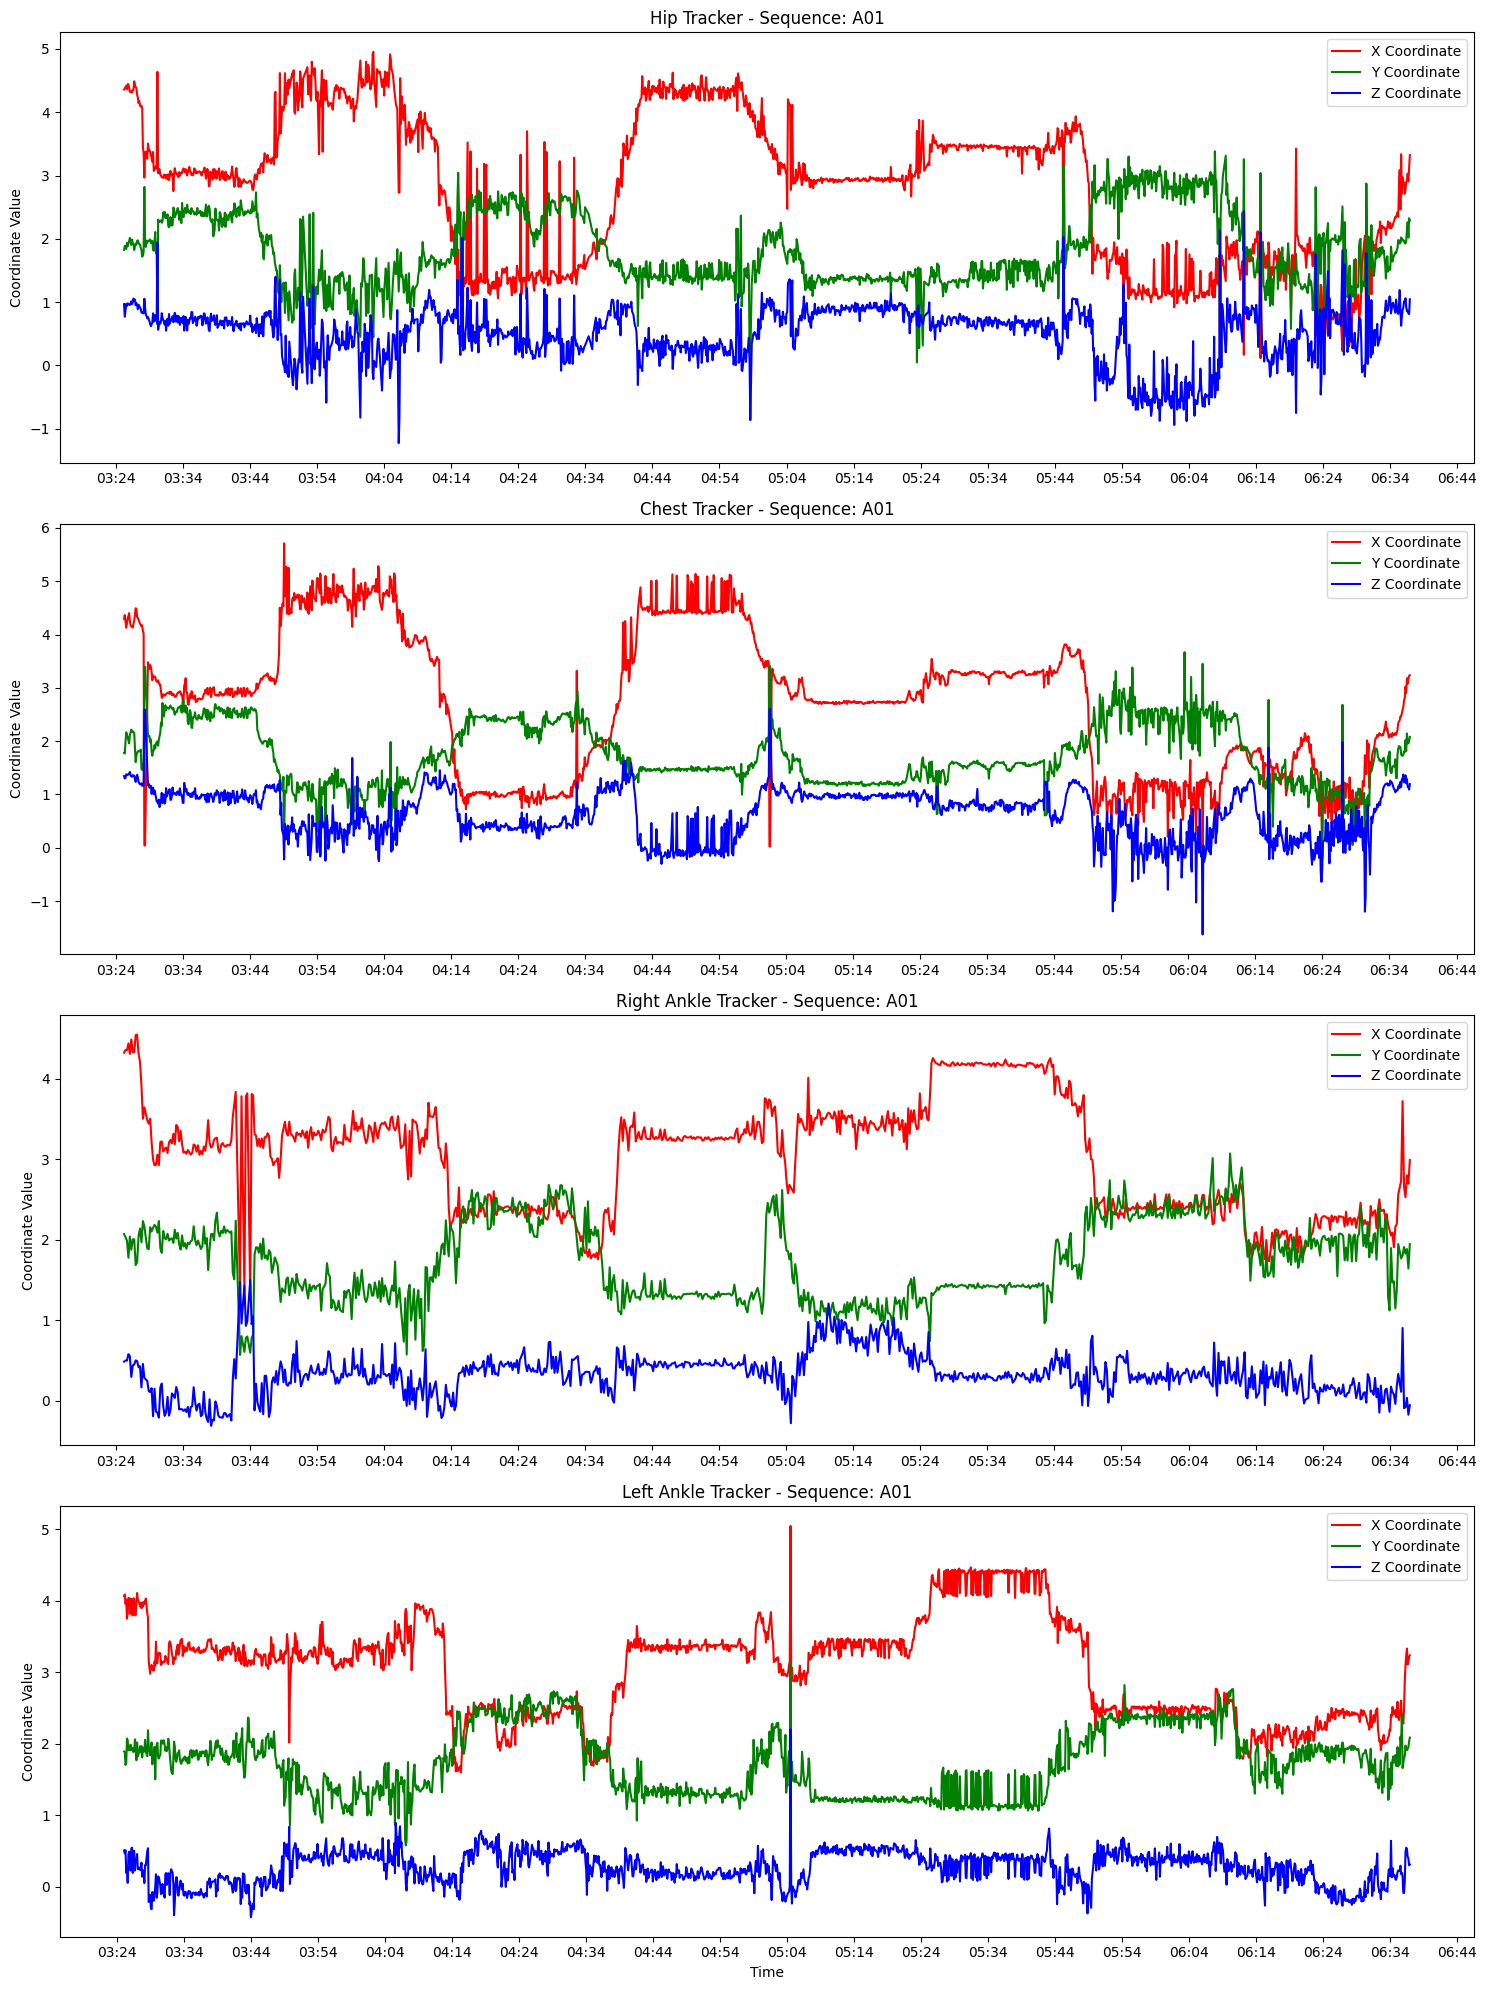

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))

tag_identifiers = ["020-000-032-221", "020-000-033-111", "010-000-030-096", "010-000-024-033"]
titles = ["Hip Tracker", "Chest Tracker", "Right Ankle Tracker", "Left Ankle Tracker"]

for ax, tag_id, title in zip(axes, tag_identifiers, titles):
    tracker_df = sequence_data[sequence_data['tag_identifier'] == tag_id]
    ax.plot(tracker_df['date'], tracker_df['x_coord'], label='X Coordinate', color='r')
    ax.plot(tracker_df['date'], tracker_df['y_coord'], label='Y Coordinate', color='g')
    ax.plot(tracker_df['date'], tracker_df['z_coord'], label='Z Coordinate', color='b')
    ax.set_title(f'{title} - Sequence: {sequence}')
    ax.set_ylabel('Coordinate Value')
    ax.legend()
    
    locator = mdates.SecondLocator(interval=10)  # Set interval to 30 seconds
    formatter = mdates.DateFormatter('%M:%S')  # Format to show hours, minutes, and seconds
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

axes[-1].set_xlabel('Time')
plt.tight_layout()
plt.show()

<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

#### Preprocessing

In [152]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import WeightedRandomSampler, DataLoader
from imblearn.over_sampling import RandomOverSampler
from tqdm import tqdm

In [123]:
# Reloading Data
df = pd.read_csv('original_full_data/localization+data+for+person+activity/ConfLongDemo_JSI.csv')
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M:%S:%f')
df = df.sort_values(by=['sequence_name', 'date'])

In [124]:
scaler = MinMaxScaler()
df[['x_coord', 'y_coord', 'z_coord']] = scaler.fit_transform(df[['x_coord', 'y_coord', 'z_coord']])

In [125]:
df = df.drop(columns=['date', 'tag_identifier', 'timestamp', 'sequence_name'])

In [126]:
def sliding_window(data, window_size, step_size):
    windows = []
    labels = []
    for i in range(0, len(data) - window_size, step_size):
        windows.append(data.iloc[i : i + window_size, :-1].values)  # Features
        labels.append(data.iloc[i + window_size - 1, -1])          # Label at end of window
    return np.array(windows), np.array(labels)

X, y = [], []
X_seq, y_seq = sliding_window(df, window_size=50, step_size=25)
X.append(X_seq)
y.append(y_seq)

X = np.concatenate(X)
y = np.concatenate(y)

In [128]:
# Reshape labels for compatibility with oversampler
X_flat = X.reshape((X.shape[0], -1))  # Flatten time-series data for oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_flat, y)

# Reshape back to original LSTM-compatible shape
X_resampled = X_resampled.reshape((-1, 50, X.shape[2]))  # Adjust window size (50) and feature size

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [137]:
encoder = OneHotEncoder()  # Use sparse=True if you want a sparse matrix

# Fit and transform
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

In [147]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
type(y_train)

(19166, 50, 3) (19166, 11)
(4792, 50, 3) (4792, 11)


scipy.sparse._csr.csr_matrix

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.toarray(), dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.toarray(), dtype=torch.float32)

In [145]:
class LSTMModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = torch.nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [149]:
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
test_dataset = torch.utils.data.TensorDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [ ]:
def train(model, device, train_loader, test_loader, optimizer, criterion, n_epochs):
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(n_epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for i, (features, labels) in enumerate(tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{n_epochs}")):
            features = features.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == torch.argmax(labels, dim=1)).sum().item()

        train_losses.append(total_loss / len(train_loader))
        train_accuracies.append(100 * correct / total)

        # Evaluate on test data
        model.eval()
        test_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for features, labels in test_loader:
                features = features.to(device)
                labels = labels.to(device)
                outputs = model(features)
                loss = criterion(outputs, labels)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_losses.append(test_loss / len(test_loader))
        test_accuracies.append(100 * correct / total)

        print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accuracies[-1]:.2f}%, Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.2f}%")

    return train_losses, train_accuracies, test_losses, test_accuracies

In [154]:
def test(model, device, test_loader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for i, (features, labels) in enumerate(test_loader):
            features = features.to(device)
            labels = labels.to(device)
            
            outputs = model(features)
            loss = criterion(outputs, labels)
            
            total_loss += loss.item()
    return total_loss / len(test_loader)

In [166]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LSTMModel(input_size=3, hidden_size=128, num_layers=2, num_classes=11)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 50

train_losses, train_accuracies, test_losses, test_accuracies = train(model, device, train_loader, test_loader, optimizer, criterion, n_epochs)


Training Epoch 1/50: 100%|██████████| 300/300 [00:10<00:00, 29.01it/s]


Epoch 1/50, Train Loss: 1.9821, Train Accuracy: 24.44%, Test Loss: 1.9262, Test Accuracy: 23.16%


Training Epoch 2/50: 100%|██████████| 300/300 [00:09<00:00, 31.90it/s]


Epoch 2/50, Train Loss: 1.6730, Train Accuracy: 38.72%, Test Loss: 1.5788, Test Accuracy: 43.41%


Training Epoch 3/50: 100%|██████████| 300/300 [00:11<00:00, 25.93it/s]


Epoch 3/50, Train Loss: 1.4597, Train Accuracy: 46.98%, Test Loss: 1.4046, Test Accuracy: 50.25%


Training Epoch 4/50: 100%|██████████| 300/300 [00:12<00:00, 23.80it/s]


Epoch 4/50, Train Loss: 1.2760, Train Accuracy: 53.40%, Test Loss: 1.1364, Test Accuracy: 57.97%


Training Epoch 5/50: 100%|██████████| 300/300 [00:10<00:00, 28.83it/s]


Epoch 5/50, Train Loss: 1.1611, Train Accuracy: 57.52%, Test Loss: 1.2786, Test Accuracy: 52.42%


Training Epoch 6/50: 100%|██████████| 300/300 [00:10<00:00, 29.61it/s]


Epoch 6/50, Train Loss: 1.1231, Train Accuracy: 58.89%, Test Loss: 1.1530, Test Accuracy: 57.12%


Training Epoch 7/50: 100%|██████████| 300/300 [00:09<00:00, 31.29it/s]


Epoch 7/50, Train Loss: 1.0916, Train Accuracy: 59.68%, Test Loss: 1.0713, Test Accuracy: 59.08%


Training Epoch 8/50: 100%|██████████| 300/300 [00:10<00:00, 28.99it/s]


Epoch 8/50, Train Loss: 1.0335, Train Accuracy: 62.49%, Test Loss: 0.9525, Test Accuracy: 65.69%


Training Epoch 9/50: 100%|██████████| 300/300 [00:10<00:00, 28.67it/s]


Epoch 9/50, Train Loss: 0.9803, Train Accuracy: 64.44%, Test Loss: 0.9011, Test Accuracy: 68.16%


Training Epoch 10/50: 100%|██████████| 300/300 [00:10<00:00, 29.20it/s]


Epoch 10/50, Train Loss: 0.9635, Train Accuracy: 64.68%, Test Loss: 0.9093, Test Accuracy: 67.70%


Training Epoch 11/50: 100%|██████████| 300/300 [00:09<00:00, 30.10it/s]


Epoch 11/50, Train Loss: 0.8952, Train Accuracy: 67.64%, Test Loss: 0.8370, Test Accuracy: 67.95%


Training Epoch 12/50: 100%|██████████| 300/300 [00:09<00:00, 30.04it/s]


Epoch 12/50, Train Loss: 0.8332, Train Accuracy: 69.99%, Test Loss: 0.7934, Test Accuracy: 72.37%


Training Epoch 13/50: 100%|██████████| 300/300 [00:10<00:00, 29.65it/s]


Epoch 13/50, Train Loss: 0.7897, Train Accuracy: 71.79%, Test Loss: 0.7316, Test Accuracy: 73.98%


Training Epoch 14/50: 100%|██████████| 300/300 [00:10<00:00, 29.92it/s]


Epoch 14/50, Train Loss: 0.8435, Train Accuracy: 69.97%, Test Loss: 0.7584, Test Accuracy: 72.98%


Training Epoch 15/50: 100%|██████████| 300/300 [00:10<00:00, 28.64it/s]


Epoch 15/50, Train Loss: 0.7736, Train Accuracy: 72.43%, Test Loss: 0.7135, Test Accuracy: 74.35%


Training Epoch 16/50: 100%|██████████| 300/300 [00:09<00:00, 31.00it/s]


Epoch 16/50, Train Loss: 0.7060, Train Accuracy: 75.43%, Test Loss: 0.6896, Test Accuracy: 75.31%


Training Epoch 17/50: 100%|██████████| 300/300 [00:10<00:00, 28.99it/s]


Epoch 17/50, Train Loss: 0.6666, Train Accuracy: 76.53%, Test Loss: 0.7780, Test Accuracy: 71.47%


Training Epoch 18/50: 100%|██████████| 300/300 [00:10<00:00, 29.52it/s]


Epoch 18/50, Train Loss: 0.7730, Train Accuracy: 73.22%, Test Loss: 0.6186, Test Accuracy: 78.26%


Training Epoch 19/50: 100%|██████████| 300/300 [00:10<00:00, 28.97it/s]


Epoch 19/50, Train Loss: 0.6500, Train Accuracy: 77.36%, Test Loss: 0.5551, Test Accuracy: 81.18%


Training Epoch 20/50: 100%|██████████| 300/300 [00:10<00:00, 28.96it/s]


Epoch 20/50, Train Loss: 0.5998, Train Accuracy: 79.32%, Test Loss: 0.7562, Test Accuracy: 73.14%


Training Epoch 21/50: 100%|██████████| 300/300 [00:10<00:00, 29.59it/s]


Epoch 21/50, Train Loss: 0.5469, Train Accuracy: 81.31%, Test Loss: 0.4783, Test Accuracy: 84.10%


Training Epoch 22/50: 100%|██████████| 300/300 [00:10<00:00, 29.95it/s]


Epoch 22/50, Train Loss: 0.5568, Train Accuracy: 80.88%, Test Loss: 0.4929, Test Accuracy: 82.60%


Training Epoch 23/50: 100%|██████████| 300/300 [00:10<00:00, 28.69it/s]


Epoch 23/50, Train Loss: 0.5264, Train Accuracy: 82.02%, Test Loss: 0.5867, Test Accuracy: 79.17%


Training Epoch 24/50: 100%|██████████| 300/300 [00:10<00:00, 29.85it/s]


Epoch 24/50, Train Loss: 0.4576, Train Accuracy: 84.48%, Test Loss: 0.5782, Test Accuracy: 79.80%


Training Epoch 25/50: 100%|██████████| 300/300 [00:10<00:00, 29.44it/s]


Epoch 25/50, Train Loss: 0.4833, Train Accuracy: 83.52%, Test Loss: 0.6061, Test Accuracy: 79.03%


Training Epoch 26/50: 100%|██████████| 300/300 [00:11<00:00, 26.49it/s]


Epoch 26/50, Train Loss: 0.4822, Train Accuracy: 83.53%, Test Loss: 0.6790, Test Accuracy: 76.09%


Training Epoch 27/50: 100%|██████████| 300/300 [00:14<00:00, 20.19it/s]


Epoch 27/50, Train Loss: 0.4599, Train Accuracy: 84.33%, Test Loss: 0.5363, Test Accuracy: 81.72%


Training Epoch 28/50: 100%|██████████| 300/300 [00:11<00:00, 25.90it/s]


Epoch 28/50, Train Loss: 0.4329, Train Accuracy: 85.12%, Test Loss: 0.4979, Test Accuracy: 82.43%


Training Epoch 29/50: 100%|██████████| 300/300 [00:11<00:00, 26.01it/s]


Epoch 29/50, Train Loss: 0.4165, Train Accuracy: 86.14%, Test Loss: 0.4490, Test Accuracy: 84.56%


Training Epoch 30/50: 100%|██████████| 300/300 [00:11<00:00, 26.05it/s]


Epoch 30/50, Train Loss: 0.3933, Train Accuracy: 86.92%, Test Loss: 0.4843, Test Accuracy: 82.87%


Training Epoch 31/50: 100%|██████████| 300/300 [00:11<00:00, 27.07it/s]


Epoch 31/50, Train Loss: 0.3668, Train Accuracy: 87.68%, Test Loss: 0.3658, Test Accuracy: 88.08%


Training Epoch 32/50: 100%|██████████| 300/300 [00:11<00:00, 25.95it/s]


Epoch 32/50, Train Loss: 0.3298, Train Accuracy: 89.09%, Test Loss: 0.4724, Test Accuracy: 83.54%


Training Epoch 33/50: 100%|██████████| 300/300 [00:12<00:00, 24.62it/s]


Epoch 33/50, Train Loss: 0.3865, Train Accuracy: 87.24%, Test Loss: 0.3723, Test Accuracy: 87.63%


Training Epoch 34/50: 100%|██████████| 300/300 [00:12<00:00, 24.35it/s]


Epoch 34/50, Train Loss: 0.3395, Train Accuracy: 88.75%, Test Loss: 0.4322, Test Accuracy: 85.68%


Training Epoch 35/50: 100%|██████████| 300/300 [00:11<00:00, 26.76it/s]


Epoch 35/50, Train Loss: 0.2740, Train Accuracy: 90.95%, Test Loss: 0.3263, Test Accuracy: 88.44%


Training Epoch 36/50: 100%|██████████| 300/300 [00:10<00:00, 27.45it/s]


Epoch 36/50, Train Loss: 0.3121, Train Accuracy: 89.68%, Test Loss: 1.2362, Test Accuracy: 64.67%


Training Epoch 37/50: 100%|██████████| 300/300 [00:10<00:00, 27.85it/s]


Epoch 37/50, Train Loss: 0.3304, Train Accuracy: 89.01%, Test Loss: 0.3026, Test Accuracy: 90.17%


Training Epoch 38/50: 100%|██████████| 300/300 [00:10<00:00, 27.68it/s]


Epoch 38/50, Train Loss: 0.2545, Train Accuracy: 91.47%, Test Loss: 0.3119, Test Accuracy: 89.38%


Training Epoch 39/50: 100%|██████████| 300/300 [00:12<00:00, 23.94it/s]


Epoch 39/50, Train Loss: 0.4214, Train Accuracy: 86.15%, Test Loss: 0.4662, Test Accuracy: 84.12%


Training Epoch 40/50: 100%|██████████| 300/300 [00:11<00:00, 25.77it/s]


Epoch 40/50, Train Loss: 0.2521, Train Accuracy: 91.70%, Test Loss: 0.3114, Test Accuracy: 89.90%


Training Epoch 41/50: 100%|██████████| 300/300 [00:11<00:00, 25.57it/s]


Epoch 41/50, Train Loss: 0.2430, Train Accuracy: 91.90%, Test Loss: 0.3331, Test Accuracy: 89.15%


Training Epoch 42/50: 100%|██████████| 300/300 [00:11<00:00, 27.08it/s]


Epoch 42/50, Train Loss: 0.2723, Train Accuracy: 90.54%, Test Loss: 0.3292, Test Accuracy: 89.04%


Training Epoch 43/50: 100%|██████████| 300/300 [00:11<00:00, 26.19it/s]


Epoch 43/50, Train Loss: 0.2327, Train Accuracy: 92.32%, Test Loss: 0.3612, Test Accuracy: 88.19%


Training Epoch 44/50: 100%|██████████| 300/300 [00:10<00:00, 28.55it/s]


Epoch 44/50, Train Loss: 0.2624, Train Accuracy: 91.20%, Test Loss: 0.2362, Test Accuracy: 92.13%


Training Epoch 45/50: 100%|██████████| 300/300 [00:10<00:00, 28.62it/s]


Epoch 45/50, Train Loss: 0.2490, Train Accuracy: 91.83%, Test Loss: 0.2674, Test Accuracy: 91.26%


Training Epoch 46/50: 100%|██████████| 300/300 [00:10<00:00, 27.71it/s]


Epoch 46/50, Train Loss: 0.3586, Train Accuracy: 88.29%, Test Loss: 0.2583, Test Accuracy: 91.44%


Training Epoch 47/50: 100%|██████████| 300/300 [00:10<00:00, 28.45it/s]


Epoch 47/50, Train Loss: 0.2141, Train Accuracy: 92.83%, Test Loss: 0.2202, Test Accuracy: 92.93%


Training Epoch 48/50: 100%|██████████| 300/300 [00:12<00:00, 24.46it/s]


Epoch 48/50, Train Loss: 0.2113, Train Accuracy: 92.76%, Test Loss: 0.2383, Test Accuracy: 91.74%


Training Epoch 49/50: 100%|██████████| 300/300 [00:11<00:00, 25.08it/s]


Epoch 49/50, Train Loss: 0.3010, Train Accuracy: 90.12%, Test Loss: 0.2369, Test Accuracy: 92.28%


Training Epoch 50/50: 100%|██████████| 300/300 [00:11<00:00, 27.24it/s]


Epoch 50/50, Train Loss: 0.1794, Train Accuracy: 94.20%, Test Loss: 0.2603, Test Accuracy: 91.63%


In [167]:
def plot_loss_accuracy(train_losses, train_accuracies, test_losses, test_accuracies):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    axes[0].plot(train_losses, label='Train Loss', color='b')
    axes[0].plot(test_losses, label='Test Loss', color='r')
    axes[0].set_title('Loss vs Epoch')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    axes[1].plot(train_accuracies, label='Train Accuracy', color='b')
    axes[1].plot(test_accuracies, label='Test Accuracy', color='r')
    axes[1].set_title('Accuracy vs Epoch')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

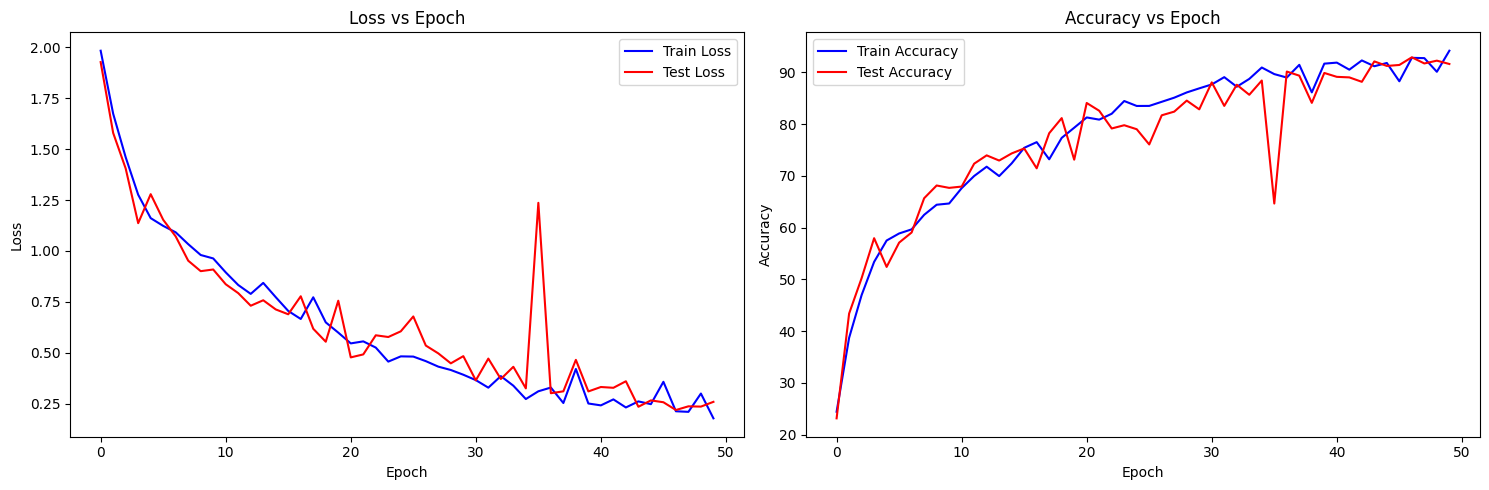

In [168]:
plot_loss_accuracy(train_losses, train_accuracies, test_losses, test_accuracies)

## Preprocessing

In [ ]:
# Reloading Data
df = pd.read_csv('original_full_data/localization+data+for+person+activity/ConfLongDemo_JSI.csv')
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y %H:%M:%S:%f')
df = df.sort_values(by=['sequence_name', 'date'])

In [104]:
# Standardizing data
scaler = RobustScaler()
df[['x_coord', 'y_coord', 'z_coord']] = scaler.fit_transform(df[['x_coord', 'y_coord', 'z_coord']])

In [105]:
# One-hot encoding activity column
encoder = OneHotEncoder()
activity_encoded = encoder.fit_transform(df[['activity']]).toarray()
activity_encoded = pd.DataFrame(activity_encoded)
df = pd.concat([df, activity_encoded], axis=1)

df.head()

,sequence_name,tag_identifier,timestamp,date,x_coord,y_coord,z_coord,activity,0,1,2,3,4,5,6,7,8,9,10
0,A01,010-000-024-033,633790226051280329,2009-05-27 14:03:25.127,0.939763,0.374941,0.319689,walking,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,A01,020-000-033-111,633790226051820913,2009-05-27 14:03:25.183,1.121771,0.213368,2.215683,walking,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,A01,020-000-032-221,633790226052091205,2009-05-27 14:03:25.210,1.175135,0.279155,1.364767,walking,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,A01,010-000-024-033,633790226052361498,2009-05-27 14:03:25.237,0.959555,0.356887,0.228086,walking,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,A01,010-000-030-096,633790226052631792,2009-05-27 14:03:25.263,1.147607,0.636297,0.275836,walking,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [106]:
def segment_data(df):
    sequences = df['sequence_name'].unique()
    sequence_data = []
    for sequence in sequences:
        sequence_df = df[df['sequence_name'] == sequence]
        sequence_df = sequence_df.drop(columns=['sequence_name', 'activity', 'tag_identifier'])
        sequence_data.append(sequence_df)
    return sequence_data

In [107]:
def pad_segments(segments, max_length):
    padded_segments = []
    for segment in segments:
        if len(segment) < max_length:
            padding = max_length - len(segment)
            padding_df = pd.DataFrame(np.zeros((padding, segment.shape[1])), columns=segment.columns)
            segment = pd.concat([segment, padding_df])
        padded_segments.append(segment)
        
    return padded_segments

segments = segment_data(df)
max_length = max([len(segment) for segment in segments])

padded_segments = pad_segments(segments, max_length)

# #checking padding
padded_segments[0].head()

,timestamp,date,x_coord,y_coord,z_coord,0,1,2,3,4,5,6,7,8,9,10
0,6.337902e+17,2009-05-27 14:03:25.127000,0.939763,0.374941,0.319689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.337902e+17,2009-05-27 14:03:25.183000,1.121771,0.213368,2.215683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,6.337902e+17,2009-05-27 14:03:25.210000,1.175135,0.279155,1.364767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,6.337902e+17,2009-05-27 14:03:25.237000,0.959555,0.356887,0.228086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6.337902e+17,2009-05-27 14:03:25.263000,1.147607,0.636297,0.275836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [108]:
for i in range(len(segments)):
    segments[i] = segments[i].drop(columns=['timestamp', 'date'])
    segments[i][['x_coord', 'y_coord', 'z_coord']] = segments[i][['x_coord', 'y_coord', 'z_coord']].rolling(window=5, min_periods=1).mean()

In [109]:
segments[0].head()

,x_coord,y_coord,z_coord,0,1,2,3,4,5,6,7,8,9,10
0,0.939763,0.374941,0.319689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.030767,0.294154,1.267686,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.078890,0.289155,1.300047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.049056,0.306088,1.032057,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.068766,0.372130,0.880812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [110]:
len(segments)

25

In [112]:
train_segments = segments[:15]
test_segments = segments[15:20]
validation_segments = segments[20:]
print(len(train_segments), len(test_segments), len(validation_segments))

15 5 5


In [83]:
def segment_time_series(data, window_size, step_size):
    n_samples = data.shape[0]
    segments = []
    for start in range(0, n_samples - window_size + 1, step_size):
        end = start + window_size
        segments.append(data.iloc[start:end])
    return segments

window_size = 50  # Example: 1 second
step_size = 25    # Example: 50% overlap

train_data = []
for segment in train_segments:
    train_data.extend(segment_time_series(segment, window_size, step_size))

test_data = []
for segment in test_segments:
    test_data.extend(segment_time_series(segment, window_size, step_size))

validation_data = []
for segment in validation_segments:
    validation_data.extend(segment_time_series(segment, window_size, step_size))

In [84]:
class_labels = np.argmax(activity_encoded.values, axis=1)

class_counts = np.bincount(class_labels)
total_samples = len(class_labels)

class_weights = total_samples / (len(class_counts) * class_counts)
class_weights = torch.tensor(class_weights, dtype=torch.float32)

In [85]:
print(total_samples)
print(class_counts)
print(class_weights)

164860
[ 2973 54480  6168  5210 27244  1706 11779 18361  1381  2848 32710]
tensor([ 5.0411,  0.2751,  2.4298,  2.8766,  0.5501,  8.7850,  1.2724,  0.8163,
        10.8525,  5.2624,  0.4582])


In [86]:
test_data[1].head()

,x_coord,y_coord,z_coord,0,1,2,3,4,5,6,7,8,9,10
89241,-1.311940,-0.447463,0.622193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89242,-1.258292,-0.431511,0.487876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89243,-1.251203,-0.418340,0.258709,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89244,-1.300651,-0.519138,0.341466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89245,-1.313969,-0.541508,0.464968,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [87]:
def convert_to_tensor(segmented_data):
    tensor_data = []
    for segment in segmented_data:
        tensor_data.append(torch.tensor(segment.values, dtype=torch.float32))
    return torch.stack(tensor_data)

train_tensor = convert_to_tensor(train_data)
test_tensor = convert_to_tensor(test_data)
validation_tensor = convert_to_tensor(validation_data)

In [88]:
train_tensor.shape

torch.Size([3545, 50, 14])

In [89]:
test_tensor.shape

torch.Size([1271, 50, 14])

### Task and evaluation (10%)

**Guidelines**: Tell us a bit about the main task that in your view this dataset could help solve and propose and justify the evaluation criteria that would be important here, not only considering the task but your exploratory data analysis. For example, if you found that there is class imbalance in the dataset and that the most important class is the minority one, you may want to add costs in your evaluation metric to account for it, or maybe you want to use a metric specifically suited for imbalanced classification.

<span style='color:red'> **[To be completed by you]** </span>


### Design and build an ML system (20%)

**Guidelines**: Taking into account the task and evaluation criteria set in the previous section design and build now an ML system. If you go for supervised learning, you could start by partiting your dataset in train and test here and try a model on the dataset. But please justify your choices in each case. Why did you choose a specific ML model? Why is it relevant for the task and dataset at hand? Do you envision any challenges with the use of such model? 

Again, we do not ask for a specific model to be used. Instead, we will evaluate the depth and appropriatedness of your analysis. As this section (and some of the following ones) are more open ended we do not specify marks for each question.


***
Please note that if the dataset of your choice is too large to work with, you can simply choose a subset of it. We will not substract any marks for doing so. 
***


In [ ]:



train_loader = torch.utils.data.DataLoader(train_tensor, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_tensor, batch_size=32, shuffle=False)
validation_loader = torch.utils.data.DataLoader(validation_tensor, batch_size=32, shuffle=False)

In [100]:
# your model building code goes here
class LSTMModel(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = torch.nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [94]:
def train(model, loader, optimizer, criterion, n_epochs):
    loss_list = []
    accuracy_list = []
    val_loss_list = []
    val_accuracy_list = []
    
    for epoch in range(n_epochs):
        model.train()
        epoch_loss = 0
        correct = 0
        total = 0
        
        for i, data in enumerate(loader):
            outputs = model(data)
            loss = criterion(outputs, data[:, -1, 3].long())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += data.size(0)
            correct += (predicted == data[:, -1, 3].long()).sum().item()
            
            if (i + 1) % 10 == 0:
                print(f'Epoch: {epoch + 1}, Batch: {i + 1}, Loss: {loss.item()}')

        loss_list.append(epoch_loss / len(loader))
        accuracy_list.append(100 * correct / total)
        print(f'Epoch: {epoch + 1}, Loss: {epoch_loss / len(loader)}, Accuracy: {100 * correct / total}%')


        model.eval()
        with torch.no_grad():
            val_loss = 0
            val_correct = 0
            val_total = 0
            for val_data in validation_loader:
                val_outputs = model(val_data)
                val_loss += criterion(val_outputs, val_data[:, -1, 3].long()).item()
                _, val_predicted = torch.max(val_outputs.data, 1)
                val_total += val_data.size(0)
                val_correct += (val_predicted == val_data[:, -1, 3].long()).sum().item()
            print(f'Validation Loss: {val_loss / len(validation_loader)}, Validation Accuracy: {100 * val_correct / val_total}% \n')
            val_loss_list.append(val_loss / len(validation_loader))
            val_accuracy_list.append(100 * val_correct / val_total)

        
    
    return loss_list, accuracy_list, val_loss_list, val_accuracy_list


In [95]:
def test(model, loader):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for data in loader:
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += data.size(0)
            correct += (predicted == data[:, -1, 3].long()).sum().item()

        print(f'Accuracy: {100 * correct / total}%')

In [96]:
model = LSTMModel(input_size=14, hidden_size=128, num_layers=2, num_classes=11)
criterion = torch.nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
n_epochs = 20

loss_list, accuracy_list, val_loss_list, val_accuracy_list = train(model, train_loader, optimizer, criterion, n_epochs)

Epoch: 1, Batch: 10, Loss: 1.4544823169708252
Epoch: 1, Batch: 20, Loss: 0.008110621012747288
Epoch: 1, Batch: 30, Loss: 0.0015124485362321138
Epoch: 1, Batch: 40, Loss: 0.0008783876546658576
Epoch: 1, Batch: 50, Loss: 0.03324694558978081
Epoch: 1, Batch: 60, Loss: 0.0007337916758842766
Epoch: 1, Batch: 70, Loss: 0.0007206248701550066
Epoch: 1, Batch: 80, Loss: 0.0007167571457102895
Epoch: 1, Batch: 90, Loss: 0.015131224878132343
Epoch: 1, Batch: 100, Loss: 0.029604898765683174
Epoch: 1, Batch: 110, Loss: 0.0008917981176637113
Epoch: 1, Loss: 0.20935253265863368, Accuracy: 98.3638928067701%
Validation Loss: 0.011112511578142982, Validation Accuracy: 97.816091954023% 

Epoch: 2, Batch: 10, Loss: 0.0010079019702970982
Epoch: 2, Batch: 20, Loss: 0.0010333419777452946
Epoch: 2, Batch: 30, Loss: 0.013954141177237034
Epoch: 2, Batch: 40, Loss: 0.0011934665963053703
Epoch: 2, Batch: 50, Loss: 0.0011841756058856845
Epoch: 2, Batch: 60, Loss: 0.0010263680014759302
Epoch: 2, Batch: 70, Loss: 0.0

In [ ]:
def graph_loss_accuracy(train_loss, val_loss, train_accuracy, val_accuracy):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

    axes[0].plot(train_loss, label='Train Loss', color='r')
    axes[0].plot(val_loss, label='Validation Loss', color='b')
    axes[0].set_title('Loss vs. Epoch')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    axes[1].plot(train_accuracy, label='Train Accuracy', color='r')
    axes[1].plot(val_accuracy, label='Validation Accuracy', color='b')
    axes[1].set_title('Accuracy vs. Epoch')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

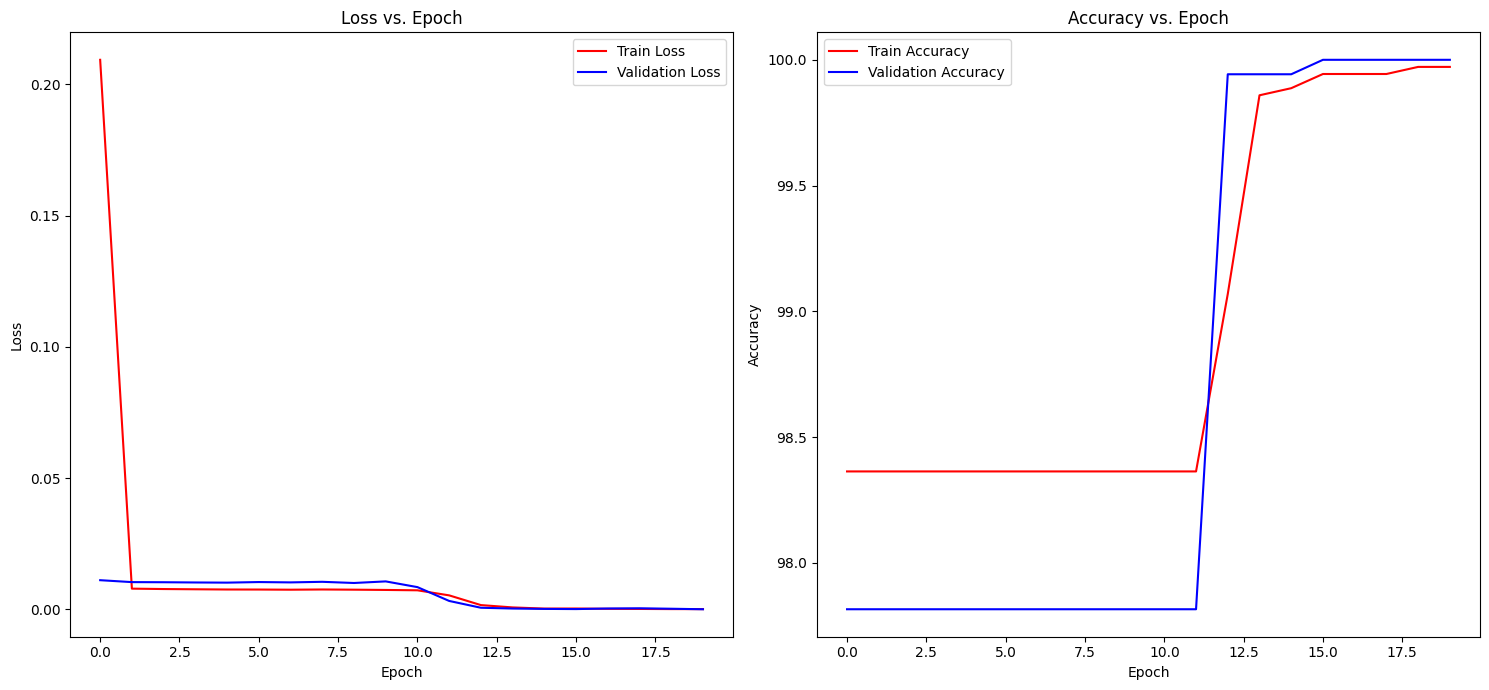

In [98]:
graph_loss_accuracy(loss_list, val_loss_list, accuracy_list, val_accuracy_list)

<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

### Experimental analysis (performance & scalability) (20%)

**Guidelines**: Test your model here. You can do hyper-parameter tuning and any ablation studies you consider important. How does your model perform? Is there any room for improvement? If so, what do you think it's needed? Comment as well on how does the model compare to previous baselines (yours or from the literature). Do you think model's performance is enough for the application that you are aiming to address? Is the model scalable to a real-world application? Is training data enough for such an application? How does the model's performance compare to a more/less computationally heavy model? Some of these questions may be more or less relevant depending on your application, so we leave it up to you to decide which factors in terms of performance and scalability you consider most important to evaluate.


In [6]:
# your experimental study here

<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

### Ethical considerations (15%)

**Guidelines**: Analyse and discuss the ethical dimensions of the application: bias, fairness, interpretability, etc. Some of these may not be relevant, but we leave this for you to decide which ones would be the relevant ones to consider for the problem at hand. Here you could do a sensitivity/interpretability analysis of the model, to study the effect of different variables or examine whether there are any biases (e.g. the model performs best for certain group of examples in your dataset). You could also link this part with your exploratory data analysis, focusing on the ethical dimensions of the dataset rather than the model you built. Justify what your analysis tell us about these ethical dimensions. 


In [8]:
# your analysis goes here

<span style='color:red'> **[Your insights go here. To be completed by you]** </span>

### Sustainable development relevance & impact (15%)

**Guidelines**: Discuss what are the current challenges surrounding this dataset in terms of sustainable development and how can ML help overcome them? Additionally, bring out all of the things you have managed to do and understand from the experiments and connect them to sustainable development. Discuss what are the challenges of deploying such a model and how it could impact our progress towards achieving the sustainable development goals. 


<span style='color:red'> **[To be completed by you]** </span>

